In [1]:
import DDM_util as util
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
from IPython import display
%matplotlib inline

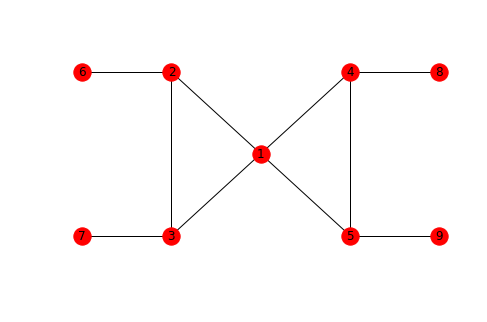

In [2]:
num_individuals = 9
L = util.create_paper_graph(num_individuals)
util.draw_paper_graph(L)

In [3]:
axis_fontsize = 12
title_fontsize = 20
legendtitle_fontsize = 16
legendlabel_fontsize = 14

## One Leader

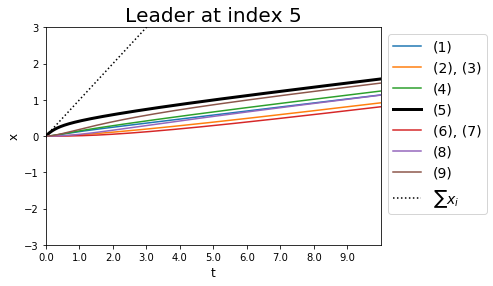

In [4]:
x0 = np.zeros([num_individuals, 1])
leader_indices = [5]
leader_betas = [1]
beta = util.create_leaderfollower_beta(num_individuals, leader_indices, leader_betas)
sigma = np.zeros([num_individuals, 1])
dt = 0.001
T = 10
x_oneleader_5 = util.run_simulation(x0, beta, L, dt, sigma, T, 4, ylim=3, title="Leader at index 5")

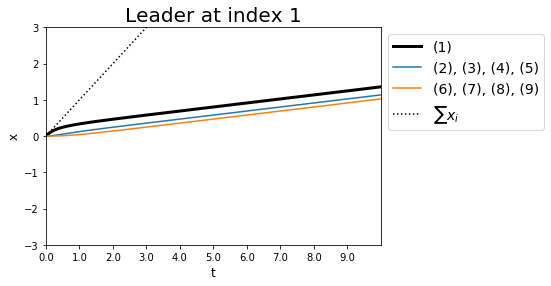

In [5]:
leader_indices = [1]
beta = util.create_leaderfollower_beta(num_individuals, leader_indices, leader_betas)
x_oneleader_1 = util.run_simulation(x0, beta, L, dt, sigma, T, 0, ylim=3, title="Leader at index 1", savename="papergraph_1")

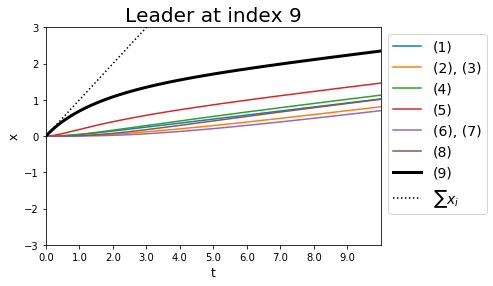

In [6]:
leader_indices = [9]
beta = util.create_leaderfollower_beta(num_individuals, leader_indices, leader_betas)
x_oneleader_9 = util.run_simulation(x0, beta, L, dt, sigma, T, 8, ylim=3, title="Leader at index 9", savename="papergraph_9")

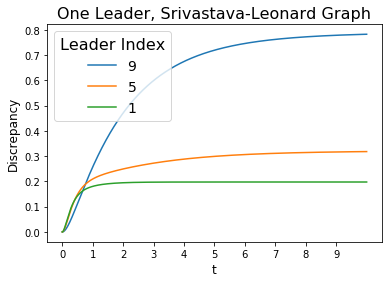

In [7]:
num_timesteps = int(T/dt)
xtick_spacing = int(num_timesteps / 10)

def plot_x(x, label, L):
    center = int(label)
    plt.plot([util.compute_discrepancy(x[:,t], center-1, L) for t in range(x.shape[1])], label=label)
plot_x(x_oneleader_9, "9", L)
plot_x(x_oneleader_5, "5", L)
plot_x(x_oneleader_1, "1", L)
legend = plt.legend(title=r"Leader Index", fontsize=legendlabel_fontsize)
plt.setp(legend.get_title(),fontsize=legendtitle_fontsize)
plt.xlabel("t", fontsize=axis_fontsize)
plt.ylabel("Discrepancy", fontsize=axis_fontsize)
plt.title(r"One Leader, Srivastava-Leonard Graph", fontsize=title_fontsize-4)
t_vals = np.arange(0, T, 1)
plt.xticks(range(0, x_oneleader_1.shape[1], int(x_oneleader_1.shape[1]/T)), t_vals)
plt.savefig("../Figures/oneleader_papergraph_centrality_discrepancy_connected", bbox_inches="tight")
plt.show()

## Two Leaders

### Same $\beta$

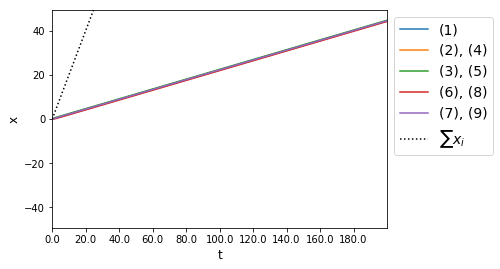

In [8]:
x0 = np.zeros([num_individuals, 1])
leader_indices = [3,5]
leader_betas = [1,1]
beta = util.create_leaderfollower_beta(num_individuals, leader_indices, leader_betas)
sigma = np.zeros([num_individuals, 1])
dt = 0.001
T = 200
x_35_same = util.run_simulation(x0, beta, L, dt, sigma, T)

### Different $\beta$

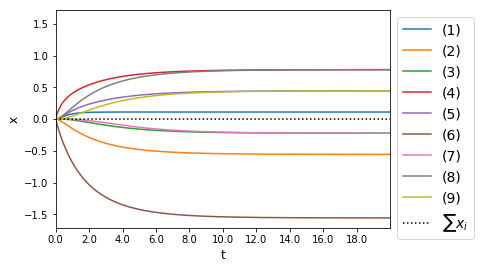

In [9]:
x0 = np.zeros([num_individuals, 1])
leader_indices = [4,6]
leader_betas = [1,-1]
beta = util.create_leaderfollower_beta(num_individuals, leader_indices, leader_betas)
sigma = np.zeros([num_individuals, 1])
dt = 0.001
T = 20
x_twoleaders_35_different = util.run_simulation(x0, beta, L, dt, sigma, T)

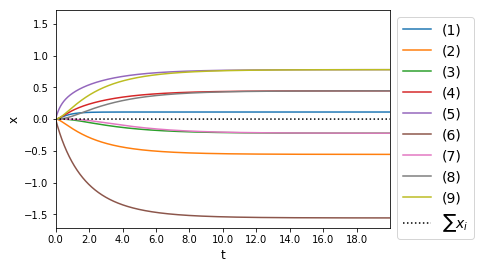

In [10]:
x0 = np.zeros([num_individuals, 1])
leader_indices = [5,6]
leader_betas = [1,-1]
beta = util.create_leaderfollower_beta(num_individuals, leader_indices, leader_betas)
sigma = np.zeros([num_individuals, 1])
dt = 0.001
T = 20
x_twoleaders_45_different = util.run_simulation(x0, beta, L, dt, sigma, T)